# Módulo 4 Sprint

**Objetivo del proyecto**
*(Competencias del módulo)*


Elaborar inferencias estadísticas a una muestra para la estimación de una población de acuerdo a los requerimientos de análisis.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

house = pd.read_csv('house.csv')
df_house = pd.DataFrame(house)

df_house = df_house.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'])

df_house



,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


***Con la previsualización del df podemos notar que existen pocas columnas con datos numéricos que podemos trabajar de manera estadística motivo por el cual haremos una mayor limpieza de las variables eligiendo solo 8 de ellas, las cuales para este análisis debieran resultar más útiles***

In [67]:
elegidas = ['LotArea', 'OverallCond', 'YearBuilt', 'Foundation', '1stFlrSF', 'FullBath', 'SaleCondition', 'SalePrice']

columnas_a_eliminar = [col for col in df_house.columns if col not in elegidas]
df_elegido = df_house.drop(columns=columnas_a_eliminar)

df_elegido.describe()


,LotArea,OverallCond,YearBuilt,1stFlrSF,FullBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,5.575342,1971.267808,1162.626712,1.565068,180921.195890
std,9981.264932,1.112799,30.202904,386.587738,0.550916,79442.502883
min,1300.000000,1.000000,1872.000000,334.000000,0.000000,34900.000000
25%,7553.500000,5.000000,1954.000000,882.000000,1.000000,129975.000000
50%,9478.500000,5.000000,1973.000000,1087.000000,2.000000,163000.000000
75%,11601.500000,6.000000,2000.000000,1391.250000,2.000000,214000.000000
max,215245.000000,9.000000,2010.000000,4692.000000,3.000000,755000.000000


***Se generan gráficos de manera de poder visualizar las distribución buscando la existencia de outliers que podrían afectar los resultados.***

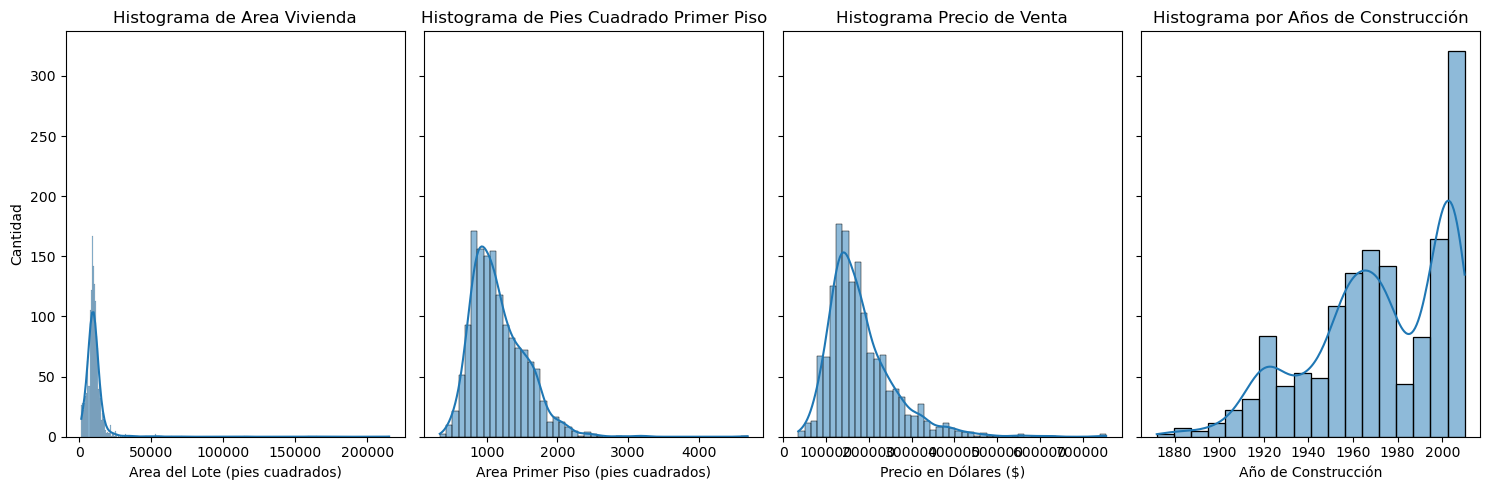

In [68]:
# Crear subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)


sns.histplot(ax=axes[0], data=df_elegido, x='LotArea', kde=True)
axes[0].set_title('Histograma de Area Vivienda')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Area del Lote (pies cuadrados)')
# Histograma para Feature2
sns.histplot(ax=axes[1], data=df_elegido, x='1stFlrSF', kde=True)
axes[1].set_title('Histograma de Pies Cuadrado Primer Piso')
axes[1].set_xlabel('Area Primer Piso (pies cuadrados)')

sns.histplot(ax=axes[2], data=df_elegido, x='SalePrice', kde=True)
axes[2].set_title('Histograma Precio de Venta')
axes[2].set_xlabel('Precio en Dólares ($)')

sns.histplot(ax=axes[3], data=df_elegido, x='YearBuilt', kde=True)
axes[3].set_title('Histograma por Años de Construcción')
axes[3].set_xlabel('Año de Construcción')



plt.tight_layout()
plt.show()




***Se puede observar que en las variables Area Vivienda, Área Primer Piso y Precio existe una distribución similar a la distribución normal corrida hacia la izquierda lo que sugiere que existen outliers o valores atipicos hacia los valores altos.***

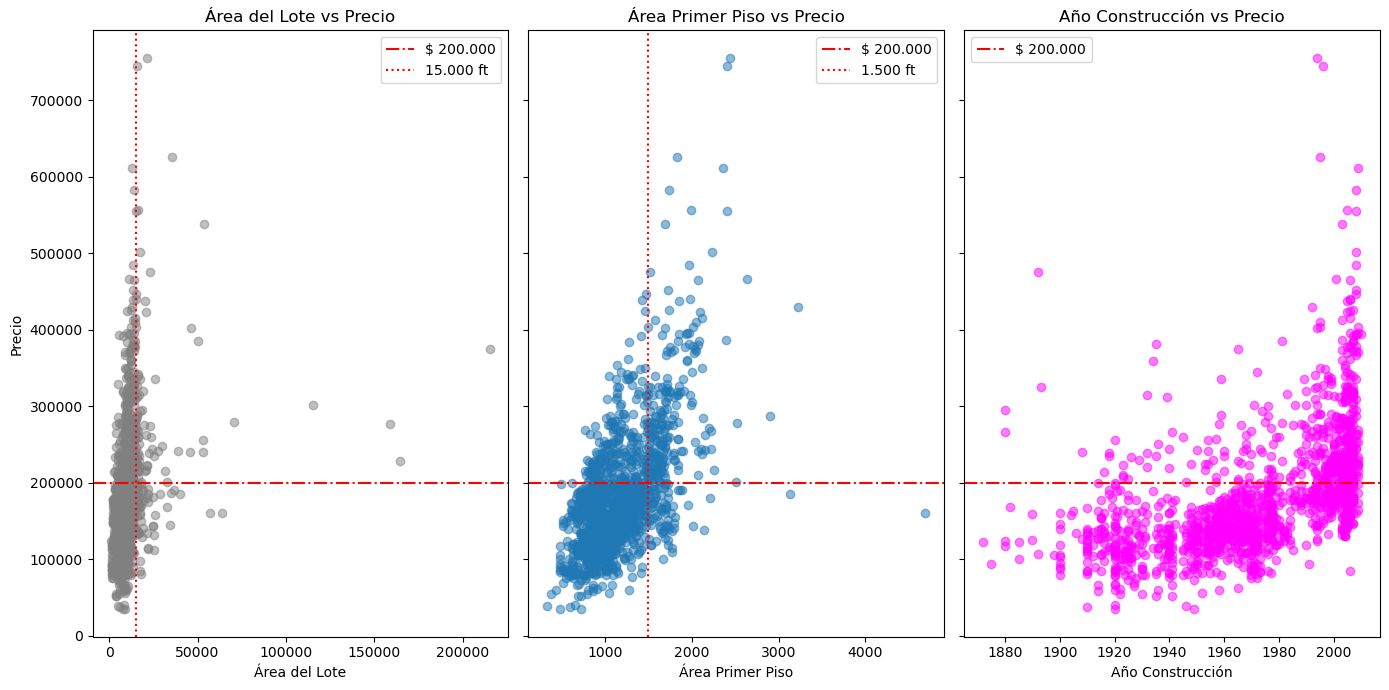

In [69]:
fig, ax = plt.subplots(1, 3, figsize= (14,7), sharey=True)

z = df_elegido['1stFlrSF']
y = df_elegido['SalePrice']
x = df_elegido['LotArea']
w = df_elegido['YearBuilt']
precio_limite = 200000
area_lote_limite = 15000
area_primer_piso_limite = 1500

# --------------------------------------------------------------------------------------------

ax[0].scatter(x, y, color='gray', alpha=0.5)
ax[0].set_title('Área del Lote vs Precio')
ax[0].set_xlabel('Área del Lote')
ax[0].set_ylabel('Precio')
ax[0].axhline(precio_limite, color='red', linestyle='-.', label='$ 200.000')
ax[0].axvline(area_lote_limite, color='red', linestyle=':', label='15.000 ft')
ax[0].legend()

# ----------------------------------------------------------------------------------------------

ax[1].scatter(z, y, alpha=0.5)
ax[1].set_title('Área Primer Piso vs Precio')
ax[1].set_xlabel('Área Primer Piso')
ax[1].axhline(precio_limite, color='red', linestyle='-.', label='$ 200.000')
ax[1].axvline(area_primer_piso_limite, color='red', linestyle=':', label='1.500 ft')
ax[1].legend()

# ----------------------------------------------------------------------------------------------

ax[2].scatter(w, y, color='fuchsia',alpha=0.5)
ax[2].set_title('Año Construcción vs Precio')
ax[2].set_xlabel('Año Construcción')
ax[2].axhline(precio_limite, color='red', linestyle='-.', label='$ 200.000')
ax[2].legend()

plt.tight_layout()
plt.show()

***Los gráficos de dispersión, por otra parte, reflejan una alta concentración de casas en rangos acotados y se puede apreciar también la existencia de outliers.  Para el objetivo del ejercicio no serán considerados, de tal manera de poder configurar gráficos con distribución normal y que se ajusta de mejor manera al cliente objetivo.***

In [77]:
df_elegido_elegido = df_elegido[(df_elegido['SalePrice'] < 200000) & (df_elegido['LotArea'] < 15000) & (df_elegido['1stFlrSF'] < 1500)]
df_elegido_elegido.describe()


,LotArea,OverallCond,YearBuilt,1stFlrSF,FullBath,SalePrice
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,8255.803728,5.708333,1961.944079,981.619518,1.354167,138916.501096
std,2823.886053,1.185541,28.907403,225.504749,0.505300,32938.998207
min,1300.000000,1.000000,1872.000000,334.000000,0.000000,34900.000000
25%,6838.500000,5.000000,1941.000000,816.000000,1.000000,118000.000000
50%,8520.500000,5.000000,1964.000000,963.000000,1.000000,139450.000000
75%,10140.000000,7.000000,1980.000000,1140.250000,2.000000,164750.000000
max,14850.000000,9.000000,2009.000000,1489.000000,3.000000,199900.000000


In [79]:
moda_area_lote = df_elegido_elegido['LotArea'].mode()[0]
moda_area_1_piso = df_elegido_elegido['1stFlrSF'].mode()[0]
moda_precio_venta = df_elegido_elegido['SalePrice'].mode()[0]

media_area_lote = round(df_elegido_elegido['LotArea'].mean(),2)
media_area_1_piso = round(df_elegido_elegido['1stFlrSF'].mean(), 2)
media_precio_venta = round(df_elegido_elegido['SalePrice'].mean(), 2)

mediana_area_lote = df_elegido_elegido['LotArea'].median()
mediana_area_1_piso = df_elegido_elegido['1stFlrSF'].median()
mediana_precio_venta = df_elegido_elegido['SalePrice'].median()



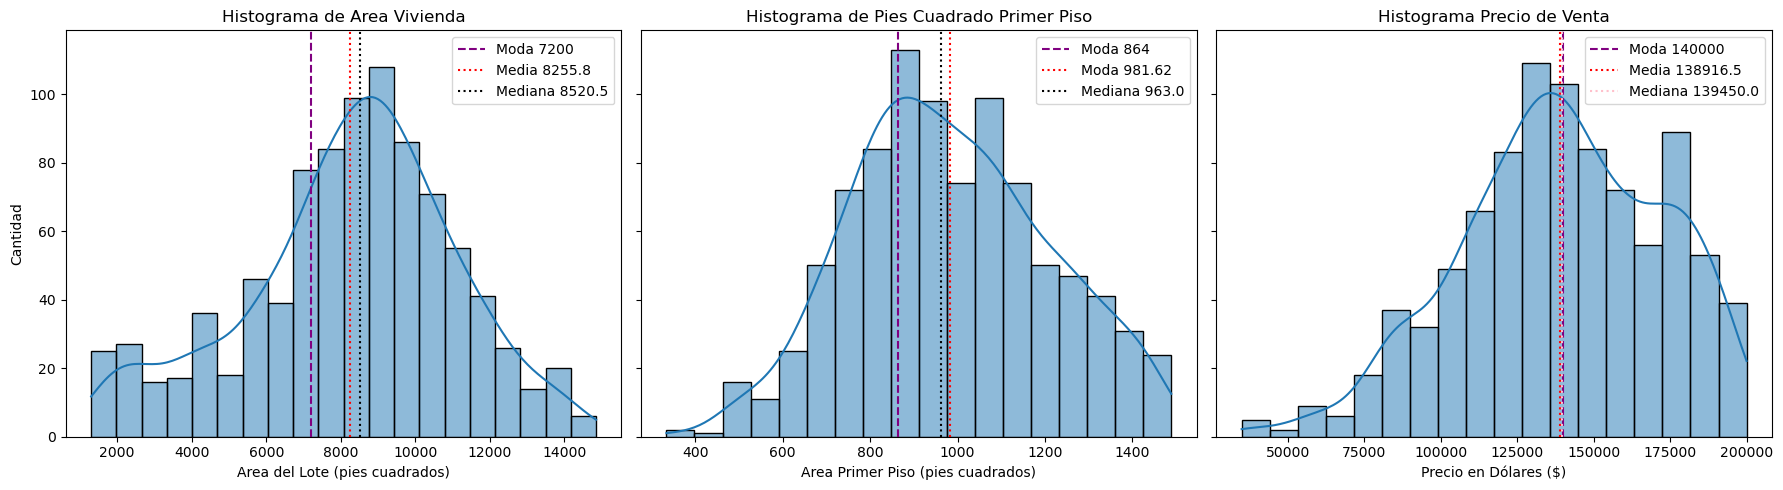

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)


sns.histplot(ax=axes[0], data=df_elegido_elegido, x='LotArea', kde=True)
axes[0].set_title('Histograma de Area Vivienda')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Area del Lote (pies cuadrados)')
axes[0].axvline(moda_area_lote,  color="purple", linestyle="--", label=f'Moda {moda_area_lote}')
axes[0].axvline(media_area_lote,  color="red", linestyle=":", label=f'Media {media_area_lote}')
axes[0].axvline(mediana_area_lote,  color="black", linestyle=":", label=f'Mediana {mediana_area_lote}')
axes[0].legend()
# Histograma para Feature2
sns.histplot(ax=axes[1], data=df_elegido_elegido, x='1stFlrSF', kde=True)
axes[1].set_title('Histograma de Pies Cuadrado Primer Piso')
axes[1].set_xlabel('Area Primer Piso (pies cuadrados)')
axes[1].axvline(moda_area_1_piso,  color="purple", linestyle="--", label=f'Moda {moda_area_1_piso}')
axes[1].axvline(media_area_1_piso,  color="red", linestyle=":", label=f'Moda {media_area_1_piso}')
axes[1].axvline(mediana_area_1_piso,  color="black", linestyle=":", label=f'Mediana {mediana_area_1_piso}')
axes[1].legend()

sns.histplot(ax=axes[2], data=df_elegido_elegido, x='SalePrice', kde=True)
axes[2].set_title('Histograma Precio de Venta')
axes[2].set_xlabel('Precio en Dólares ($)')
axes[2].axvline(moda_precio_venta,  color="purple", linestyle="--", label=f'Moda {moda_precio_venta}')
axes[2].axvline(media_precio_venta,  color="red", linestyle=":", label=f'Media {media_precio_venta}')
axes[2].axvline(mediana_precio_venta,  color="pink", linestyle=":", label=f'Mediana {mediana_precio_venta}')
axes[2].legend()

plt.tight_layout()
plt.show()


Luego de realizada la limpieza de datos eliminando outliers se puede ver en los gráficos que los datos tienden a demostrar una tendencia hacia la distribución normal no obstante sigue existiendo características asimétricas, principalmente en las variables Área Primer Piso y Precio de Venta, las cuales se destacan en el gráfico con líneas verticales.

In [81]:
df_elegido_elegido['PricePerFeetSquare'] = df_elegido_elegido['SalePrice'] / df_elegido_elegido['LotArea']
df_elegido_elegido



,LotArea,OverallCond,YearBuilt,Foundation,1stFlrSF,FullBath,SaleCondition,SalePrice,PricePerFeetSquare
1,9600,8,1976,CBlock,1262,2,Normal,181500,18.906250
3,9550,5,1915,BrkTil,961,1,Abnorml,140000,14.659686
5,14115,5,1993,Wood,796,1,Normal,143000,10.131066
8,6120,5,1931,BrkTil,1022,2,Abnorml,129900,21.225490
9,7420,6,1939,BrkTil,1077,1,Normal,118000,15.902965
...,...,...,...,...,...,...,...,...,...
1452,3675,5,2005,PConc,1072,1,Normal,145000,39.455782
1454,7500,5,2004,PConc,1221,2,Normal,185000,24.666667
1455,7917,5,1999,PConc,953,2,Normal,175000,22.104332
1458,9717,6,1950,CBlock,1078,1,Normal,142125,14.626428


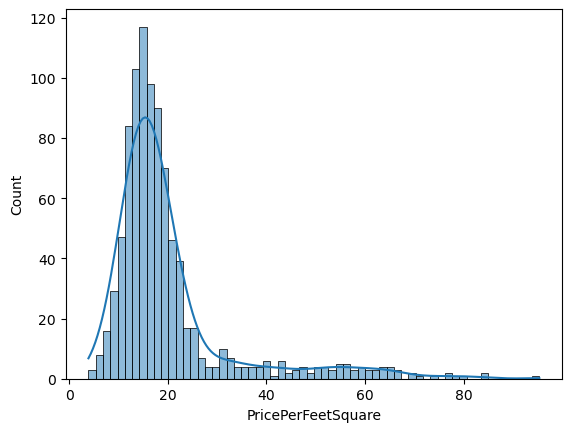

In [82]:


sns.histplot(data=df_elegido_elegido, x='PricePerFeetSquare', kde=True)


plt.show()

In [83]:
df_super_elegido = df_elegido_elegido[df_elegido_elegido['PricePerFeetSquare'] < 28]

moda_area_lote = df_super_elegido['LotArea'].mode()[0]            # 7200
moda_area_1_piso = df_super_elegido['1stFlrSF'].mode()[0]         # 864
moda_precio_venta = df_super_elegido['SalePrice'].mode()[0]       # 140000
moda_ppfs = df_super_elegido['PricePerFeetSquare'].mode()[0]      # 12.5

media_area_lote = round(df_super_elegido['LotArea'].mean(),2)               # 9770.64
media_area_1_piso = round(df_super_elegido['1stFlrSF'].mean(), 2)           # 197.83
media_precio_venta = round(df_super_elegido['SalePrice'].mean(), 2)         # 159588.31
media_ppfs = round(df_super_elegido['PricePerFeetSquare'].mean(), 2)        # 16.77

mediana_area_lote = df_super_elegido['LotArea'].median()                    # 9525.0
mediana_area_1_piso = df_super_elegido['1stFlrSF'].median()                 # 1044.0
mediana_precio_venta = df_super_elegido['SalePrice'].median()               # 152000.0
mediana_ppfs = round(df_super_elegido['PricePerFeetSquare'].median(), 2)    # 16.5

df_super_elegido


,LotArea,OverallCond,YearBuilt,Foundation,1stFlrSF,FullBath,SaleCondition,SalePrice,PricePerFeetSquare
1,9600,8,1976,CBlock,1262,2,Normal,181500,18.906250
3,9550,5,1915,BrkTil,961,1,Abnorml,140000,14.659686
5,14115,5,1993,Wood,796,1,Normal,143000,10.131066
8,6120,5,1931,BrkTil,1022,2,Abnorml,129900,21.225490
9,7420,6,1939,BrkTil,1077,1,Normal,118000,15.902965
...,...,...,...,...,...,...,...,...,...
1450,9000,5,1974,CBlock,896,2,Normal,136000,15.111111
1454,7500,5,2004,PConc,1221,2,Normal,185000,24.666667
1455,7917,5,1999,PConc,953,2,Normal,175000,22.104332
1458,9717,6,1950,CBlock,1078,1,Normal,142125,14.626428


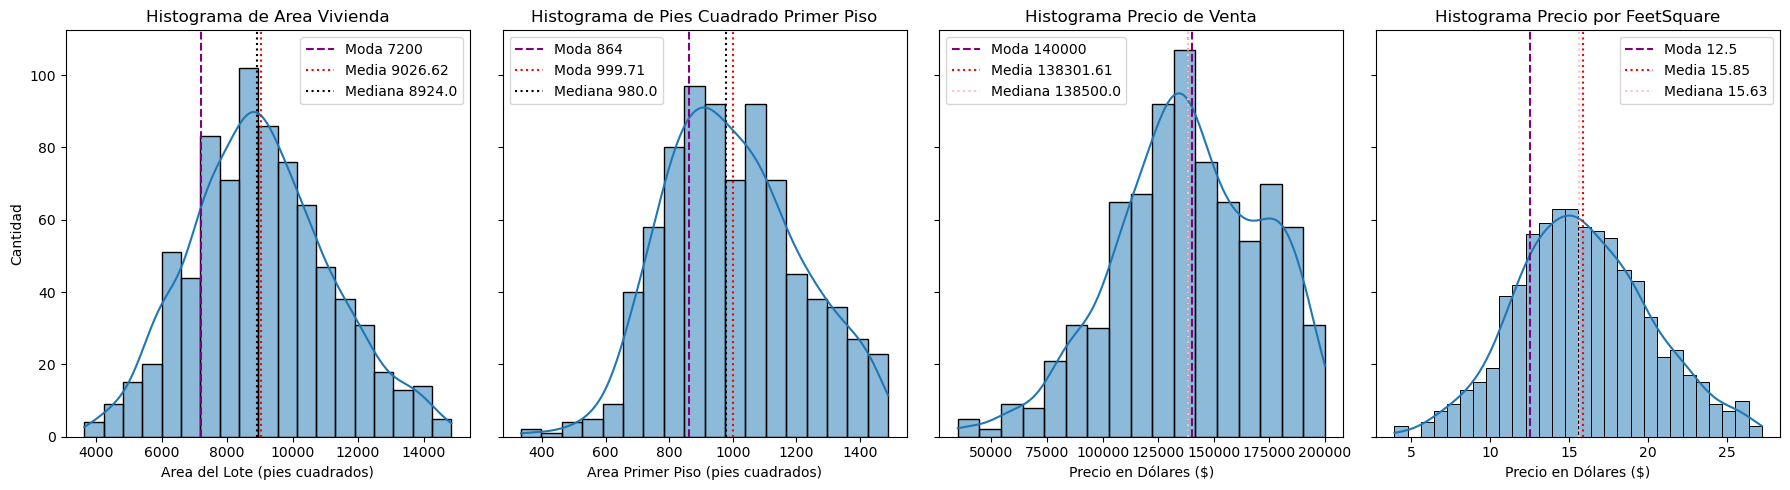

In [84]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)


sns.histplot(ax=axes[0], data=df_super_elegido, x='LotArea', kde=True)
axes[0].set_title('Histograma de Area Vivienda')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Area del Lote (pies cuadrados)')
axes[0].axvline(moda_area_lote,  color="purple", linestyle="--", label=f'Moda {moda_area_lote}')
axes[0].axvline(media_area_lote,  color="red", linestyle=":", label=f'Media {media_area_lote}')
axes[0].axvline(mediana_area_lote,  color="black", linestyle=":", label=f'Mediana {mediana_area_lote}')
axes[0].legend()
# Histograma para Feature2
sns.histplot(ax=axes[1], data=df_super_elegido, x='1stFlrSF', kde=True)
axes[1].set_title('Histograma de Pies Cuadrado Primer Piso')
axes[1].set_xlabel('Area Primer Piso (pies cuadrados)')
axes[1].axvline(moda_area_1_piso,  color="purple", linestyle="--", label=f'Moda {moda_area_1_piso}')
axes[1].axvline(media_area_1_piso,  color="red", linestyle=":", label=f'Moda {media_area_1_piso}')
axes[1].axvline(mediana_area_1_piso,  color="black", linestyle=":", label=f'Mediana {mediana_area_1_piso}')
axes[1].legend()

sns.histplot(ax=axes[2], data=df_super_elegido, x='SalePrice', kde=True)
axes[2].set_title('Histograma Precio de Venta')
axes[2].set_xlabel('Precio en Dólares ($)')
axes[2].axvline(moda_precio_venta,  color="purple", linestyle="--", label=f'Moda {moda_precio_venta}')
axes[2].axvline(media_precio_venta,  color="red", linestyle=":", label=f'Media {media_precio_venta}')
axes[2].axvline(mediana_precio_venta,  color="pink", linestyle=":", label=f'Mediana {mediana_precio_venta}')
axes[2].legend()

sns.histplot(ax=axes[3], data=df_super_elegido, x='PricePerFeetSquare', bins=28, kde=True)
axes[3].set_title('Histograma Precio por FeetSquare')
axes[3].set_xlabel('Precio en Dólares ($)')
axes[3].axvline(moda_ppfs,  color="purple", linestyle="--", label=f'Moda {moda_ppfs}')
axes[3].axvline(media_ppfs,  color="red", linestyle=":", label=f'Media {media_ppfs}')
axes[3].axvline(mediana_ppfs,  color="pink", linestyle=":", label=f'Mediana {mediana_ppfs}')
axes[3].legend()

plt.tight_layout()
plt.show()
